In [11]:
import pydotplus 
import pandas as pd

from IPython.display import Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score

#Считываем данные
file_data = open('german.data-numeric.txt').read()
data, target = [], []

for line in file_data.splitlines():
    recs = line.split()
    data.append(recs[:-1])
    target.append(recs[-1])    

In [12]:
#строим дерево с помощью sklearn
model = tree.DecisionTreeClassifier(max_depth = 5)
model.fit(data, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [13]:
dot_data = tree.export_graphviz(model, out_file="tree.out",  
                         filled=True, rounded=True,  
                         special_characters=True)

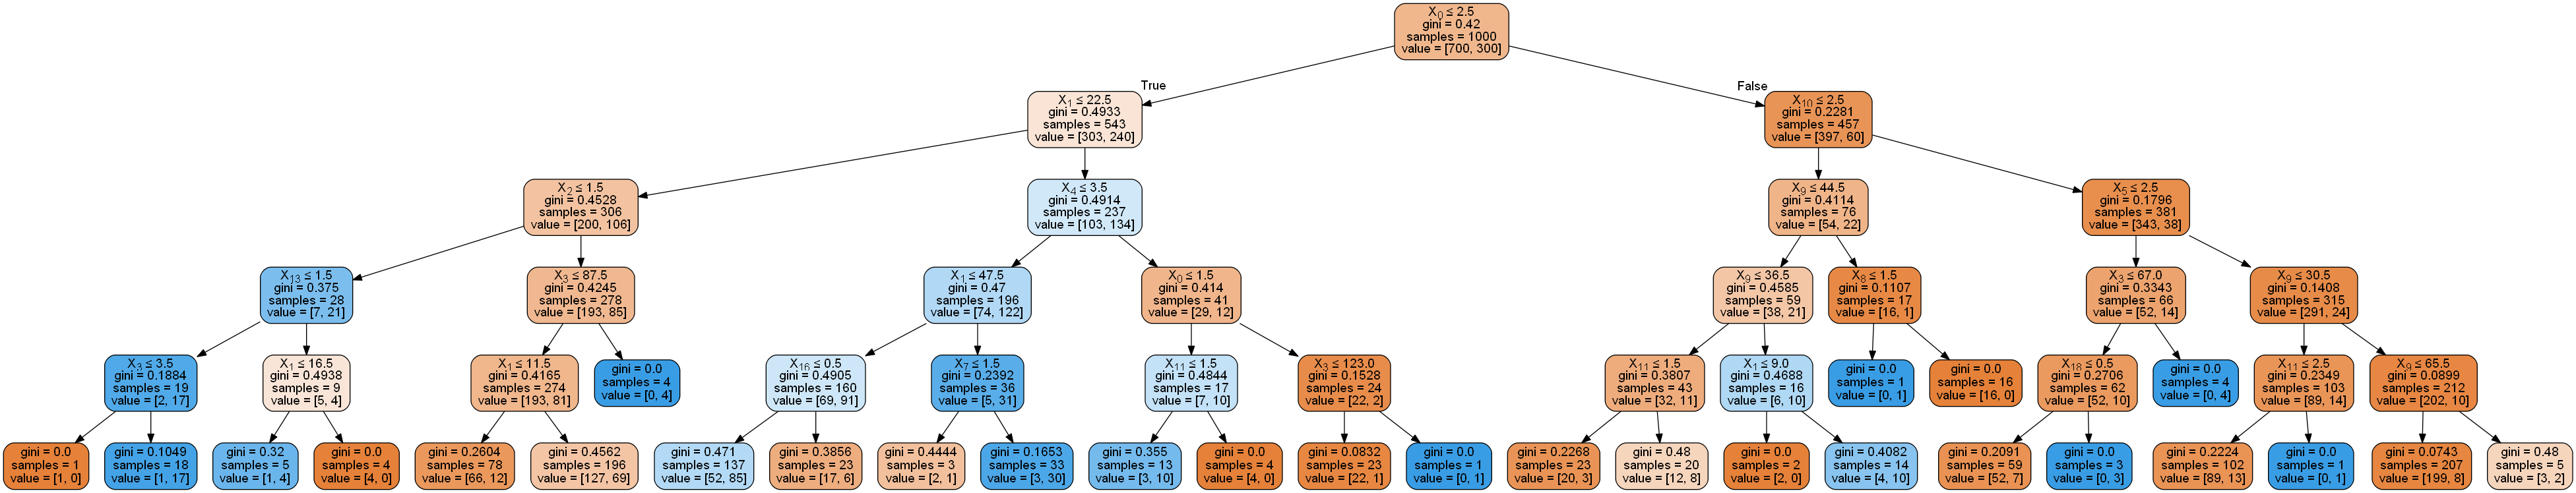

In [14]:
#визуализируем
graph = pydotplus.graphviz.graph_from_dot_file("tree.out")  
Image(graph.create_png())

In [15]:
#Постройте графики зависимости качества на кросс-валидации и на обучающей выборке от глубины дерева
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.2)

In [16]:
accuracies = []
for i in range(1, 20, 1):
    model = tree.DecisionTreeClassifier(max_depth = i)
    model.fit(train_data, train_target)
    train_predictions = model.predict(train_data)
    accuracies.append(accuracy_score(train_target, train_predictions))

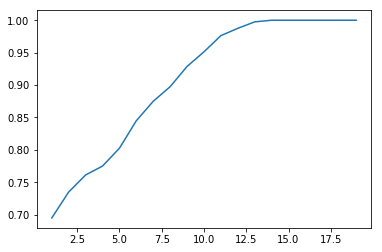

In [17]:
from matplotlib import pyplot
pyplot.plot(range(1, 20, 1), accuracies)
pyplot.show()
#График для обучающей выборки

In [18]:
cv_scories = []
for i in range(1, 20, 1):
    result = np.mean(cross_val_score(tree.DecisionTreeClassifier(max_depth=i), 
                     data, target, cv = 10, scoring = 'accuracy'))
    cv_scories.append(result)

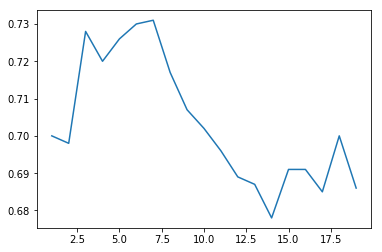

In [19]:
pyplot.plot(range(1, 20, 1), cv_scories)
pyplot.show()
#График для кросс-валидации

In [20]:
#большая глубина ведет к снижению качества; влияет переобучение